In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
df=pd.read_excel('Average_Brand_Similarity_Matrix.xlsx')
df.head()

,Unnamed: 0,Jolta,Okla,Evee,Jaguar,Pakzon,Metro
0,Jolta,0.000000,4.497826,4.554348,3.960145,3.880435,2.380435
1,Okla,4.497826,0.000000,4.291304,3.697101,3.617391,2.117391
2,Evee,4.554348,4.291304,0.000000,3.753623,3.673913,2.173913
3,Jaguar,3.960145,3.697101,3.753623,0.000000,3.079710,1.579710
4,Pakzon,3.880435,3.617391,3.673913,3.079710,0.000000,1.500000


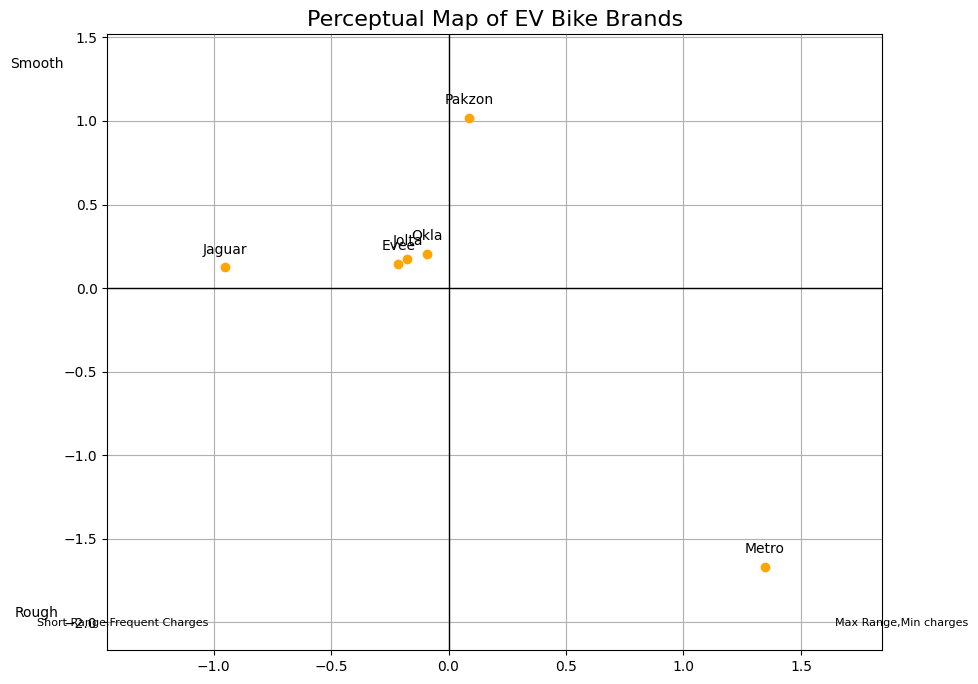

In [ ]:

# Convert similarity matrix to a dissimilarity matrix
numeric_df = df.select_dtypes(include=np.number)
distance_matrix = numeric_df.max().max() - numeric_df

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(distance_matrix)

# Create a DataFrame for MDS coordinates
mds_df = pd.DataFrame(mds_coordinates, columns=['Short Range,Frequent Charges-Max Range,Min charges', 'Rough-Smooth'], index=df.index)

# Plotting the perceptual map with quadrants
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(mds_df['Short Range,Frequent Charges-Max Range,Min charges'], mds_df['Rough-Smooth'], color='orange')

# Define a dictionary to map labels
label_map = {
    0: 'Jolta',
    1: 'Okla',
    2: 'Evee',
    3: 'Jaguar',
    4: 'Pakzon',
    5: 'Metro'
}

# Add labels for each brand
for label, x, y in zip(mds_df.index, mds_df['Short Range,Frequent Charges-Max Range,Min charges'], mds_df['Rough-Smooth']):
    plt.annotate(label_map.get(label, label), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adding lines for quadrants
plt.axhline(0, color='black', linewidth=1)  # Horizontal line for Traditional to Modern
plt.axvline(0, color='black', linewidth=1)  # Vertical line for Cheap to Expensive

# Label the quadrants
plt.text(mds_df['Short Range,Frequent Charges-Max Range,Min charges'].min() - 0.8, mds_df['Rough-Smooth'].max() + 0.3, 'Smooth', fontsize=10, horizontalalignment='center')
plt.text(mds_df['Short Range,Frequent Charges-Max Range,Min charges'].min() - 0.8, mds_df['Rough-Smooth'].min() - 0.3, 'Rough', fontsize=10, horizontalalignment='center')
plt.text(mds_df['Short Range,Frequent Charges-Max Range,Min charges'].min() - 0.8, -2, 'Short Range,Frequent Charges', fontsize=8, verticalalignment='center')
plt.text(mds_df['Short Range,Frequent Charges-Max Range,Min charges'].max() + 0.3, -2, 'Max Range,Min charges', fontsize=8, verticalalignment='center')

# Set limits for the axes
plt.xlim(mds_df['Short Range,Frequent Charges-Max Range,Min charges'].min() - 0.5, mds_df['Short Range,Frequent Charges-Max Range,Min charges'].max() + 0.5)
plt.ylim(mds_df['Rough-Smooth'].min() - 0.5, mds_df['Rough-Smooth'].max() + 0.5)

# Title and axis labels
plt.title('Perceptual Map of EV Bike Brands', fontsize=16)
plt.xlabel('') # Remove x-label
plt.ylabel('') # Remove y-label

plt.grid(True)
plt.show()